In [312]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
atheism= pd.read_csv("atheism.csv")
atheism2=pd.read_csv("atheism2.csv")

In [314]:
atheism.rename(columns={'nationality':'country'},inplace=True)

Exercise 5: Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?

If the conditions for inference are reasonable, we can either calculate the standard error and construct the interval by hand, or we can use scipy.stats, a Python library of useful statistical functions offered by SciPy.

In [315]:
us12 = atheism[(atheism.country == 'United States') & (atheism.year == 2012)]
conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  # the Z value for the specified confidence level

prbs = us12.response.value_counts(normalize = True)  #the proportions for the response of atheist and non-atheist
se = np.sqrt(prbs.prod()/len(us12))  #the standard error

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

#conditions for inference
us_atheist = prbs.get("atheist")
us_num = len(us12)
if us_num * us_atheist>=10 and us_num*(1-us_atheist)>= 10:
    print("Conditions for inference met and have 10 successes and 10 failures in the sample")
else:
    print ("Conditions for inference do not met")
print(f'Number of successes (atheist) = {len(us12)*prbs.loc["atheist"]}')
print(f'Number of failures (non-atheist) = {len(us12)*prbs.loc["non-atheist"]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {float(ci1), float(ci2)}')

Conditions for inference met and have 10 successes and 10 failures in the sample
Number of successes (atheist) = 50.0
Number of failures (non-atheist) = 952.0
Standard error = 0.006878629122390021
95% confidence interval = (0.0364183342579056, 0.0633820649436912)


Exercise 6: Based on the output, what is the margin of error for the estimate of the proportion of the proportion of atheists in US in 2012?

In [316]:
print(f"margin of error = {z_value*se}")

margin of error = 0.0134818653428928


Exercise 7: Calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets to construct the confidence intervals.

In [317]:
atheism['country'].unique()

array(['Afghanistan', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cameroon', 'Canada', 'China', 'Colombia',
       'Czech Republic', 'Ecuador', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Ghana', 'Hong Kong', 'Iceland', 'India',
       'Iraq', 'Ireland', 'Italy', 'Japan', 'Kenya', 'Korea Rep (South)',
       'Lebanon', 'Lithuania', 'Macedonia', 'Malaysia', 'Moldova',
       'Netherlands', 'Nigeria', 'Pakistan',
       'Palestinian territories (West Bank and Gaza)', 'Peru', 'Poland',
       'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia',
       'South Africa', 'South Sudan', 'Spain', 'Sweden', 'Switzerland',
       'Tunisia', 'Turkey', 'Ukraine', 'United States', 'Uzbekistan',
       'Vietnam'], dtype=object)

In [318]:
china2012 = atheism[(atheism.country == 'China') & (atheism.year==2012)]
china_num = len(china2012)

chinaprbs = china2012.response.value_counts(normalize = True) #proportions
chinase = np.sqrt(prbs.prod()/len(china2012)) #standard error

china_meanprbs = chinaprbs.mean() 

china_lower = china_meanprbs - z_value * chinase
china_upper = china_meanprbs + z_value * chinase

china_atheist = chinaprbs.get("atheist")
if china_num * china_atheist>=10 and china_num*(1-china_atheist)>= 10:
    print("Conditions for inference met and have 10 successes and 10 failures in the sample")
else:
    print ("Conditions for inference do not met")

print(f'Number of atheists in China is {china_num*chinaprbs.loc["atheist"]}')
print(f'Number of non-atheists in China is {china_num*chinaprbs.loc["non-atheist"]}')
print(f"Standard error for China 2012 is {chinase}")
print(f'{(conf_lvl*100)}% confidence interval for China is {float(china_lower), float(china_upper)}')
print(f"Margin of erorr for China is {z_value*chinase}")

Conditions for inference met and have 10 successes and 10 failures in the sample
Number of atheists in China is 235.0
Number of non-atheists in China is 265.0
Standard error for China 2012 is 0.009737573586946482
95.0% confidence interval for China is (0.4809147064727764, 0.5190852935272237)
Margin of erorr for China is 0.019085293527223615


In [319]:
japan2012 = atheism[(atheism.country == 'Japan') & (atheism.year==2012)]
japan_num = len(japan2012)

japanprbs = japan2012.response.value_counts(normalize = True)
japanse = np.sqrt(prbs.prod()/len(japan2012))

japan_meanprbs = japanprbs.mean() 

japan_lower = japan_meanprbs - z_value * japanse
japan_upper = japan_meanprbs + z_value * japanse

japan_atheist = japanprbs.get("atheist")
if japan_num * japan_atheist>=10 and japan_num*(1-japan_atheist)>= 10:
    print("Conditions for inference met and have 10 successes and 10 failures in the sample")
else:
    print ("Conditions for inference do not met")

print(f'Number of atheists in Japan = {japan_num*japanprbs.loc["atheist"]}')
print(f'Number of non-atheists in Japan = {japan_num*japanprbs.loc["non-atheist"]}')
print(f"Standard error for Japan 2012 is {japanse}")
print(f'{(conf_lvl*100)}% confidence interval for Japan is {float(japan_lower), float(japan_upper)}')
print(f"Margin of erorr for Japan is {z_value*japanse}")

Conditions for inference met and have 10 successes and 10 failures in the sample
Number of atheists in Japan = 372.0
Number of non-atheists in Japan = 839.9999999999999
Standard error for Japan 2012 is 0.0062543826007581075
95.0% confidence interval for Japan is (0.4877416353569802, 0.5122583646430199)
Margin of erorr for Japan is 0.012258364643019846


Extra credit will be applied to those that edit the bar plot of countries by religiosity in a better color scheme

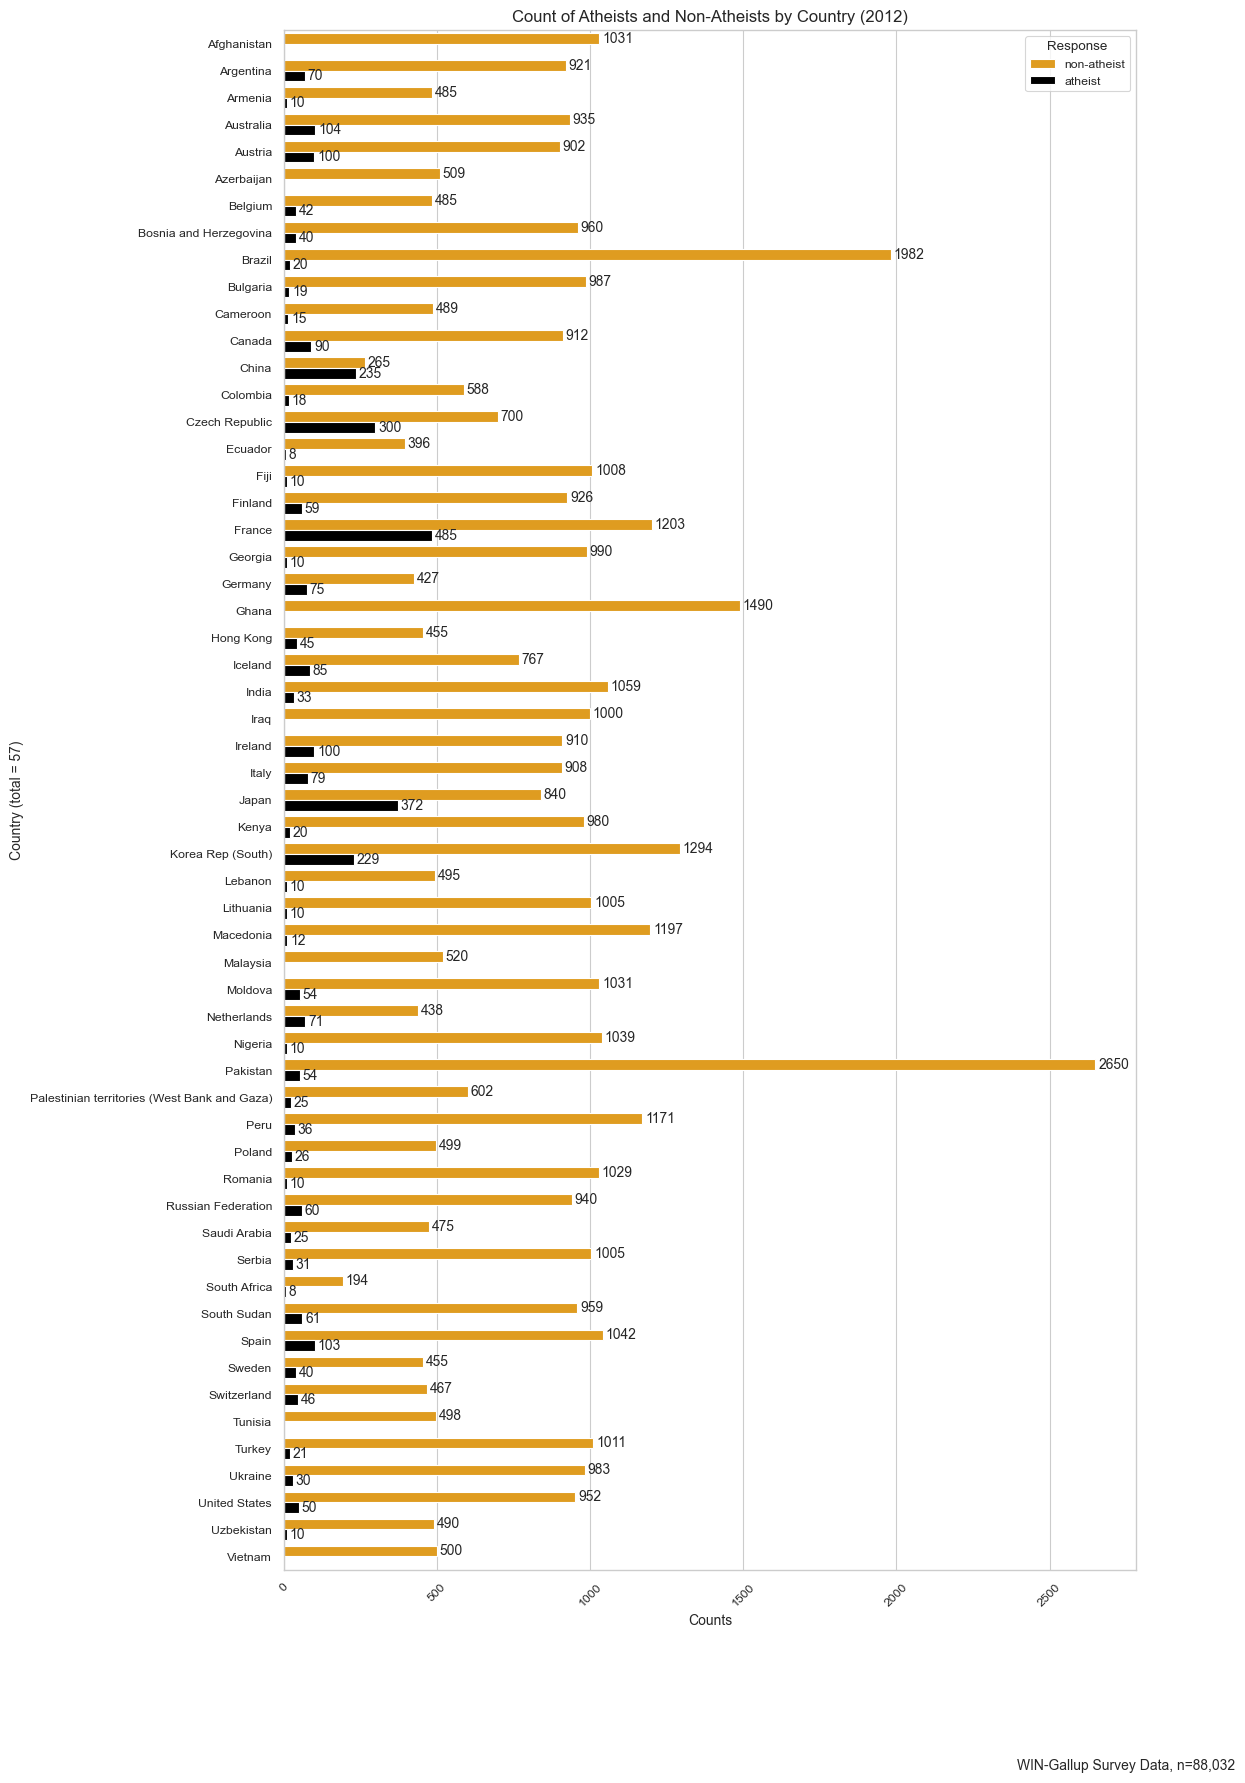

In [320]:
yr_2012 = atheism2[atheism2['year'] == 2012]
data_2012 = yr_2012.groupby(['country', 'response']).sum().reset_index()

plt.figure(figsize=(11, 20))
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"font.size": 10})

ax1 = sns.barplot(x='count', y='country', hue='response', data=data_2012, palette={'atheist': 'black', 'non-atheist': 'orange'}, errorbar=None)
#get count number for each bar
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title("Count of Atheists and Non-Atheists by Country (2012)", fontsize=12)
plt.xlabel("Counts", fontsize=10)
plt.ylabel("Country (total = 57)", fontsize=10)
plt.xticks(rotation=45) 
plt.legend(title='Response', loc='upper right')
plt.figtext(0.99, 0.01, 'WIN-Gallup Survey Data, n=88,032', horizontalalignment='right')
plt.show()

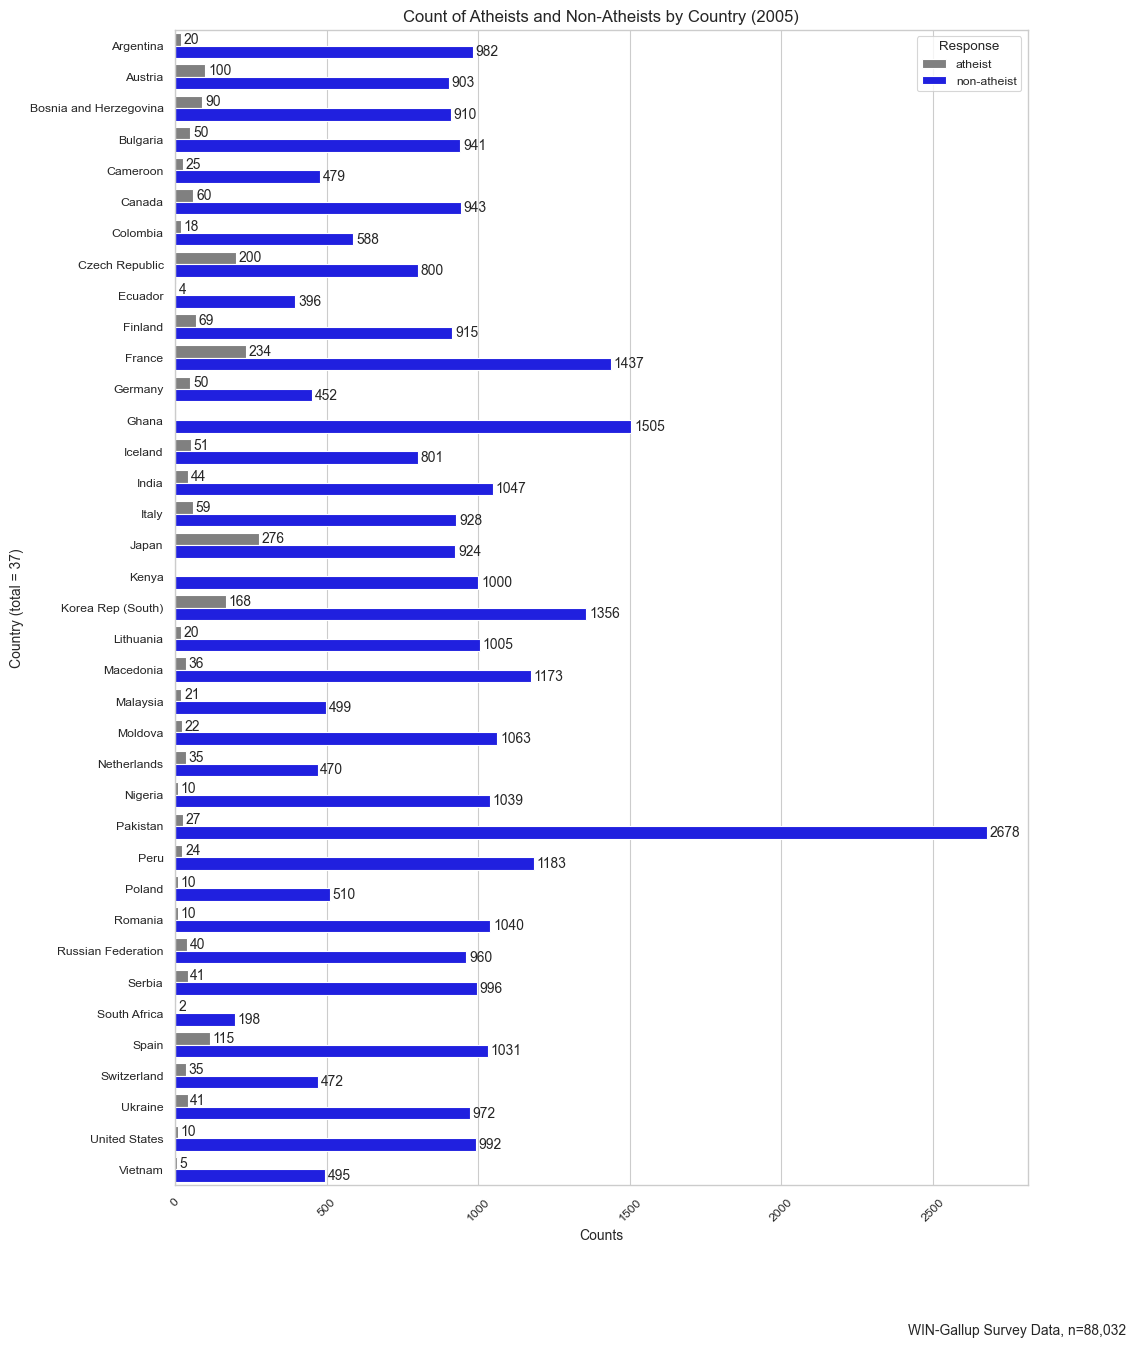

In [321]:
yr_2005 = atheism2[atheism2['year'] == 2005]
data_2005 = yr_2005.groupby(['country', 'response']).sum().reset_index()

plt.figure(figsize=(11, 15))
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"font.size": 10})

ax2 = sns.barplot(x='count', y='country', hue='response', data=data_2005, palette={'atheist': 'gray', 'non-atheist': 'blue'}, errorbar=None)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title("Count of Atheists and Non-Atheists by Country (2005)", fontsize=12)
plt.xlabel("Counts", fontsize=10)
plt.ylabel("Country (total = 37)", fontsize=10)
plt.xticks(rotation=45) 
plt.legend(title='Response', loc='upper right')
plt.figtext(0.99, 0.01, 'WIN-Gallup Survey Data, n=88,032', horizontalalignment='right')
plt.show()

In [322]:
print(len(yr_2005["country"].unique()))
print(len(yr_2012['country'].unique()))

37
57
